In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.misc import imread

In [5]:
img = imread('./data_ass_2/IMG_1878.JPG')

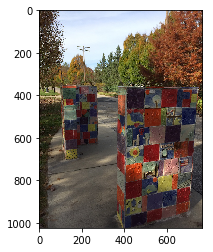

In [7]:
plt.imshow(img)
plt.show()

In [8]:
img_red=img[:,:,0]
img_green = img[:,:,1]
img_blue = img[:,:,2]

In [40]:
def generate_color_patch(color_img, rowsize, patches):
    idx=np.random.randint(color_img.shape[0]-rowsize)
    patch_stack=color_img[idx:idx+rowsize]
    for i in range(patches-1):
        rand = np.random.randint(color_img.shape[0]-rowsize)
        patch_stack=np.hstack((patch_stack, color_img[rand:rand+rowsize]))
    return patch_stack

In [41]:
rand_patch_stack = generate_color_patch(img_red, 8, 3)

In [42]:
rand_patch_stack = np.hstack((rand_patch_stack, generate_color_patch(img_green,8,3)))
rand_patch_stack = np.hstack((rand_patch_stack, generate_color_patch(img_blue,8,3)))

In [58]:
def power_iteration(X) : 
    conv_thresh = 0.0001
    x_0 = np.random.randn(X.shape[0])
    itr = 0
    while True : 
        itr +=1 
        x_n = np.dot(X, x_0)
        norm = np.linalg.norm(x_n)
        x_n = x_n / norm 
        if itr % 1000 == 0 : 
            print(itr, np.linalg.norm(x_n - x_0))
        if np.linalg.norm(x_n - x_0) < conv_thresh : 
            break 
        else : 
            x_0 = x_n
    return x_n

In [64]:
cov_data = np.zeros((rand_patch_stack.shape[0],rand_patch_stack.shape[0]))
for i in range(rand_patch_stack.shape[0]): 
    for j in range(rand_patch_stack.shape[0]):
        cov_data[i][j]=np.sum((rand_patch_stack[i]-np.mean(rand_patch_stack[i])).dot(rand_patch_stack[j]-np.mean(rand_patch_stack[j]))/(len(rand_patch_stack[i])-1))

In [65]:

eigen_vectors = None 
for i in range(8) : 
    vector_e = power_iteration(cov_data)
    vector_e = vector_e.reshape((vector_e.shape[0],1))
    eigen_v = np.linalg.norm(cov_data.dot(vector_e)) / np.linalg.norm(vector_e)
    if eigen_vectors is None : 
        eigen_vectors = vector_e 
    else : 
        eigen_vectors = np.hstack([eigen_vectors,vector_e])
    cov_data = cov_data - eigen_v*vector_e.dot(vector_e.T)

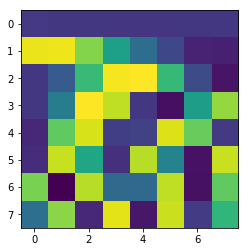

In [66]:
plt.imshow(eigen_vectors.T)
plt.show()
plt.savefig("./data_Ass_2/eigen_vector_3_patch.png")

In [71]:
rand_patch_stack = generate_color_patch(img_red, 8, 30)
rand_patch_stack = np.hstack((rand_patch_stack, generate_color_patch(img_green,8,30)))
rand_patch_stack = np.hstack((rand_patch_stack, generate_color_patch(img_blue,8,30)))

cov_data_30 = np.zeros((rand_patch_stack.shape[0],rand_patch_stack.shape[0]))
for i in range(rand_patch_stack.shape[0]): 
    for j in range(rand_patch_stack.shape[0]):
        cov_data_30[i][j]=np.sum((rand_patch_stack[i]-np.mean(rand_patch_stack[i])).dot(rand_patch_stack[j]-np.mean(rand_patch_stack[j]))/(len(rand_patch_stack[i])-1))

In [72]:
eigen_vectors_30 = None 
for i in range(8) : 
    vector_e = power_iteration(cov_data_30)
    vector_e = vector_e.reshape((vector_e.shape[0],1))
    eigen_v = np.linalg.norm(cov_data_30.dot(vector_e)) / np.linalg.norm(vector_e)
    if eigen_vectors_30 is None : 
        eigen_vectors_30 = vector_e 
    else : 
        eigen_vectors_30 = np.hstack([eigen_vectors_30,vector_e])
    cov_data_30 = cov_data_30 - eigen_v*vector_e.dot(vector_e.T)

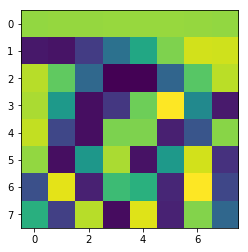

In [74]:
plt.imshow(eigen_vectors_30.T)
plt.show()